In [1]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("airline-passengers.csv", index_col="month", parse_dates= True)
data

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: title={'center': 'Passengers Data'}, xlabel='month'>

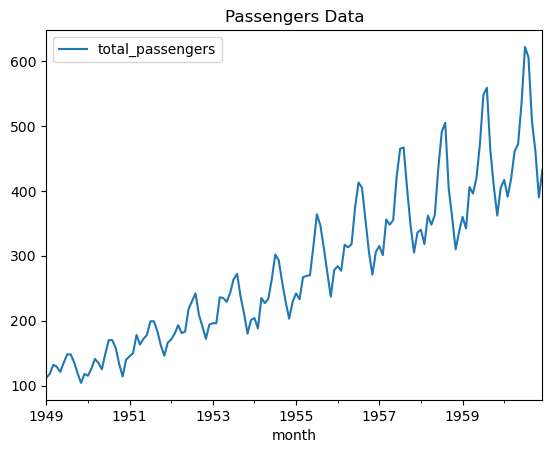

In [3]:
data[["total_passengers"]].plot(title = "Passengers Data")

In [4]:
data.index #veriseti aylıkmış
data.index.freq = "MS"
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq='MS')

In [5]:
#verimizi parçalayalım.
train = data[:120]
test = data[120:]

# Şimdi şu ana kadar gördüğümüz tüm yöntemleri bu problem üzerinde deneyelim.

In [6]:
errors = [] 

In [7]:
def plot_prediction(y_pred, label):
    train["total_passengers"].plot(legend=True, label="TRAIN")
    test["total_passengers"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using "+label)
    plt.show()

## Single Exponential Smoothing (SES)

In [8]:
def ses_optimizer(train, alphas, step=48):

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae


In [9]:
alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=24)

alpha: 0.01 mae: 225.5863
alpha: 0.11 mae: 82.528
alpha: 0.21 mae: 82.8979
alpha: 0.31 mae: 89.8377
alpha: 0.41 mae: 99.0585
alpha: 0.51 mae: 107.5558
alpha: 0.61 mae: 113.7514
alpha: 0.71 mae: 117.2224
alpha: 0.81 mae: 118.1776
alpha: 0.91 mae: 117.2438
best_alpha: 0.11 best_mae: 82.528


In [10]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level= best_alpha)
y_pred = ses_model.forecast(24)

In [11]:
ses_mae = mean_absolute_error(test, y_pred)
errors.append(ses_mae)

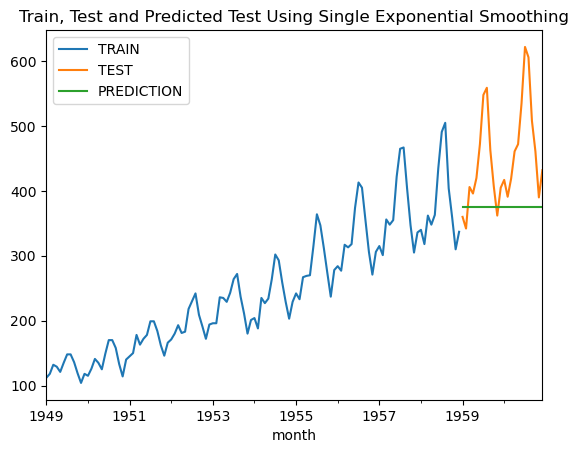

In [12]:
plot_prediction(y_pred, "Single Exponential Smoothing")

## Double Exponentioal Smoothing (DES)

In [13]:
def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae


In [14]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas,step = 24)

alpha: 0.01 beta: 0.01 mae: 54.9512
alpha: 0.01 beta: 0.11 mae: 54.1036
alpha: 0.01 beta: 0.21 mae: 55.5568
alpha: 0.01 beta: 0.31 mae: 57.3247
alpha: 0.01 beta: 0.41 mae: 57.7931
alpha: 0.01 beta: 0.51 mae: 57.9968
alpha: 0.01 beta: 0.61 mae: 57.9637
alpha: 0.01 beta: 0.71 mae: 57.5635
alpha: 0.01 beta: 0.81 mae: 57.3334
alpha: 0.01 beta: 0.91 mae: 57.8983
alpha: 0.11 beta: 0.01 mae: 55.0309
alpha: 0.11 beta: 0.11 mae: 58.4728
alpha: 0.11 beta: 0.21 mae: 69.6339
alpha: 0.11 beta: 0.31 mae: 72.555
alpha: 0.11 beta: 0.41 mae: 78.8168
alpha: 0.11 beta: 0.51 mae: 81.996
alpha: 0.11 beta: 0.61 mae: 77.2262
alpha: 0.11 beta: 0.71 mae: 71.5042
alpha: 0.11 beta: 0.81 mae: 69.0258
alpha: 0.11 beta: 0.91 mae: 67.8408
alpha: 0.21 beta: 0.01 mae: 57.1824
alpha: 0.21 beta: 0.11 mae: 74.992
alpha: 0.21 beta: 0.21 mae: 95.9492
alpha: 0.21 beta: 0.31 mae: 115.3164
alpha: 0.21 beta: 0.41 mae: 139.4303
alpha: 0.21 beta: 0.51 mae: 178.3759
alpha: 0.21 beta: 0.61 mae: 243.4543
alpha: 0.21 beta: 0.71 mae:

In [15]:
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha, smoothing_trend=best_beta)
y_pred = des_model.forecast(24)

In [16]:
des_mae = mean_absolute_error(test, y_pred)
errors.append(des_mae)

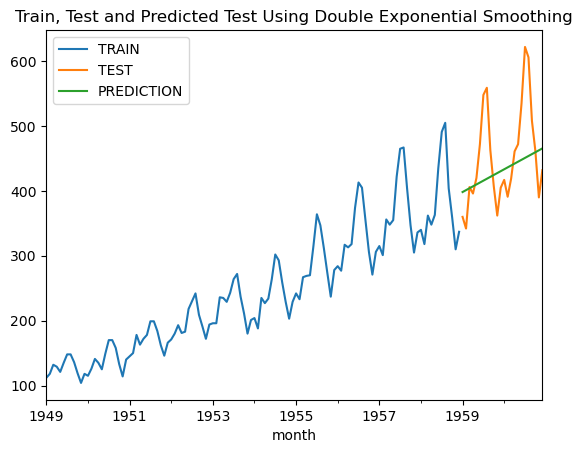

In [17]:
plot_prediction(y_pred, "Double Exponential Smoothing")

## Triple Exponentioal Smoothing (TES)

In [18]:
def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae


In [19]:
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

In [20]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step = 24)

[0.1, 0.1, 0.1, 36.83]
[0.1, 0.1, 0.3, 34.88]
[0.1, 0.1, 0.5, 35.91]
[0.1, 0.1, 0.7, 38.72]
[0.1, 0.1, 0.9, 42.55]
[0.1, 0.3, 0.1, 53.96]
[0.1, 0.3, 0.3, 53.0]
[0.1, 0.3, 0.5, 56.98]
[0.1, 0.3, 0.7, 61.38]
[0.1, 0.3, 0.9, 67.17]
[0.1, 0.5, 0.1, 56.76]
[0.1, 0.5, 0.3, 51.72]
[0.1, 0.5, 0.5, 53.39]
[0.1, 0.5, 0.7, 60.08]
[0.1, 0.5, 0.9, 79.29]
[0.1, 0.7, 0.1, 34.04]
[0.1, 0.7, 0.3, 25.93]
[0.1, 0.7, 0.5, 27.81]
[0.1, 0.7, 0.7, 27.91]
[0.1, 0.7, 0.9, 38.32]
[0.1, 0.9, 0.1, 26.87]
[0.1, 0.9, 0.3, 25.32]
[0.1, 0.9, 0.5, 53.88]
[0.1, 0.9, 0.7, 38.38]
[0.1, 0.9, 0.9, 17.78]
[0.3, 0.1, 0.1, 54.54]
[0.3, 0.1, 0.3, 38.34]
[0.3, 0.1, 0.5, 31.57]
[0.3, 0.1, 0.7, 30.99]
[0.3, 0.1, 0.9, 29.23]
[0.3, 0.3, 0.1, 72.71]
[0.3, 0.3, 0.3, 22.6]
[0.3, 0.3, 0.5, 11.99]
[0.3, 0.3, 0.7, 17.11]
[0.3, 0.3, 0.9, 22.32]
[0.3, 0.5, 0.1, 132.33]
[0.3, 0.5, 0.3, 25.74]
[0.3, 0.5, 0.5, 17.3]
[0.3, 0.5, 0.7, 38.38]
[0.3, 0.5, 0.9, 56.82]
[0.3, 0.7, 0.1, 288.32]
[0.3, 0.7, 0.3, 134.86]
[0.3, 0.7, 0.5, 96.77]
[0.3, 0.7, 

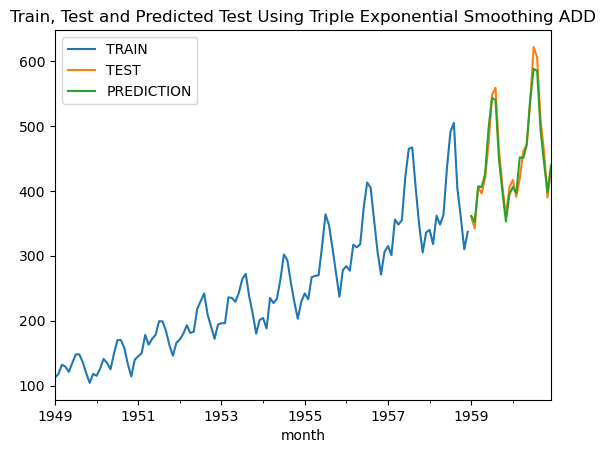

In [21]:
tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).fit(smoothing_level=best_alpha,
                                                                                              smoothing_trend=best_beta,
                                                                                              smoothing_seasonal=best_gamma)
y_pred = tes_model.forecast(24)
plot_prediction(y_pred, "Triple Exponential Smoothing ADD")

In [22]:
tes_mae = mean_absolute_error(test, y_pred)
errors.append(tes_mae)

## ARIMA(p, d, q) : Autoregressive Integrated Moving Average

In [23]:
def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arima_model_result = ARIMA(train, order=order).fit()
            aic = arima_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except Exception as e:
            print(f"ARIMA{order} modelinde hata oluştu: {e}")
            continue
    
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params

In [24]:
 p = d = q = range(0,4)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [25]:
best_params_aic = arima_optimizer_aic(train, pdq)
best_params_aic

ARIMA(0, 0, 0) AIC=1436.33
ARIMA(0, 0, 1) AIC=1295.42
ARIMA(0, 0, 2) AIC=1229.22
ARIMA(0, 0, 3) AIC=1169.78
ARIMA(0, 1, 0) AIC=1138.81
ARIMA(0, 1, 1) AIC=1127.02
ARIMA(0, 1, 2) AIC=1126.97
ARIMA(0, 1, 3) AIC=1125.45
ARIMA(0, 2, 0) AIC=1171.65
ARIMA(0, 2, 1) AIC=1136.52
ARIMA(0, 2, 2) AIC=1124.36
ARIMA(0, 2, 3) AIC=1124.57
ARIMA(0, 3, 0) AIC=1263.95
ARIMA(0, 3, 1) AIC=1169.49
ARIMA(0, 3, 2) AIC=1140.39
ARIMA(0, 3, 3) AIC=1127.31
ARIMA(1, 0, 0) AIC=1152.40
ARIMA(1, 0, 1) AIC=1138.85
ARIMA(1, 0, 2) AIC=1140.24
ARIMA(1, 0, 3) AIC=1142.18
ARIMA(1, 1, 0) AIC=1130.66
ARIMA(1, 1, 1) AIC=1125.43
ARIMA(1, 1, 2) AIC=1118.10
ARIMA(1, 1, 3) AIC=1119.79
ARIMA(1, 2, 0) AIC=1168.21
ARIMA(1, 2, 1) AIC=1127.97
ARIMA(1, 2, 2) AIC=1122.89
ARIMA(1, 2, 3) AIC=1123.66
ARIMA(1, 3, 0) AIC=1232.81
ARIMA(1, 3, 1) AIC=1166.48
ARIMA(1, 3, 2) AIC=1170.58
ARIMA(1, 3, 3) AIC=1130.67
ARIMA(2, 0, 0) AIC=1141.99
ARIMA(2, 0, 1) AIC=1138.37
ARIMA(2, 0, 2) AIC=1138.68
ARIMA(2, 0, 3) AIC=1135.89
ARIMA(2, 1, 0) AIC=1126.84
A

(3, 1, 3)

In [26]:
#son parametrelere göre modeli tekrar oluşturup hata değerine bakalım.
arima_model = ARIMA(train, order = best_params_aic).fit()
y_pred = arima_model.forecast(24)


In [27]:
arima_mae = mean_absolute_error(test, y_pred)
errors.append(arima_mae)

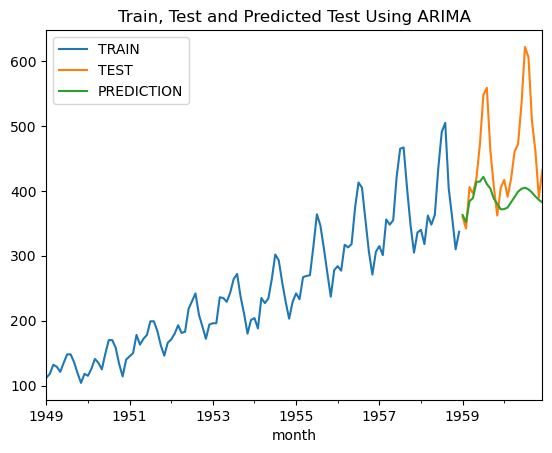

In [28]:
plot_prediction(y_pred, "ARIMA")

## SARIMA(p, d, q)(P, D, Q)m : Seasonal Autoregressive Integrated Moving Average

In [29]:
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('En iyi SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

In [30]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [31]:
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1680.2792351899682
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1557.6320698999825
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1060.4792883429307
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1014.0696747520267
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1231.986585377873
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1185.301097909583
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:969.3781382610554
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:951.6223224921928
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1524.3620853403545
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1403.5942348893623
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:967.5225695583002
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:942.2425093046963
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1136.499882949517
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1127.8397018154778
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:918.2233876023275
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:896.7301332038693
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1138.8088994229304
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10

In [32]:
sarima_model = SARIMAX(train, order = best_order, seasonal_order= best_seasonal_order).fit(disp= 0)
y_pred = sarima_model.get_forecast(24)
y_pred = y_pred.predicted_mean

In [33]:
sarima_mae = mean_absolute_error(test, y_pred)
errors.append(sarima_mae)

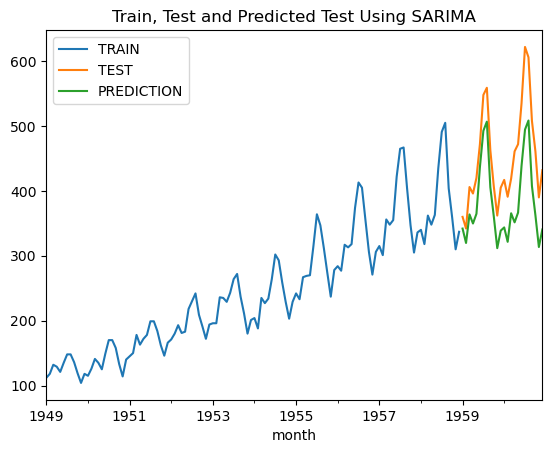

In [34]:
plot_prediction(y_pred, "SARIMA")

Sonuçlar tatmin edici değil. Bir de SARIMA optimizer için mean absolute versiyonunu deneyelim.

In [35]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=24)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('En iyi SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

In [36]:
best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:452.25
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:367.2095448077286
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:71.25
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:72.62972632700075
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:74.93608404358334
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:76.79705557367159
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:58.599738797649344
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:30.61095248035741
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:442.6732363260292
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:356.28978563277764
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:70.49252847732824
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:71.32051671407108
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:75.48450312767777
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:76.43173318117904
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:61.01388547770694
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:31.72628402075408
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:115.25
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:119.36368435302369
SARIMA(0, 1, 0)x(0, 1, 

In [37]:
sarima_model_mae = SARIMAX(train, order = best_order, seasonal_order= best_seasonal_order).fit(disp= 0)
y_pred = sarima_model_mae.get_forecast(24)
y_pred = y_pred.predicted_mean

In [38]:
sarima_mae_model_mae = mean_absolute_error(test, y_pred)
errors.append(sarima_mae_model_mae)

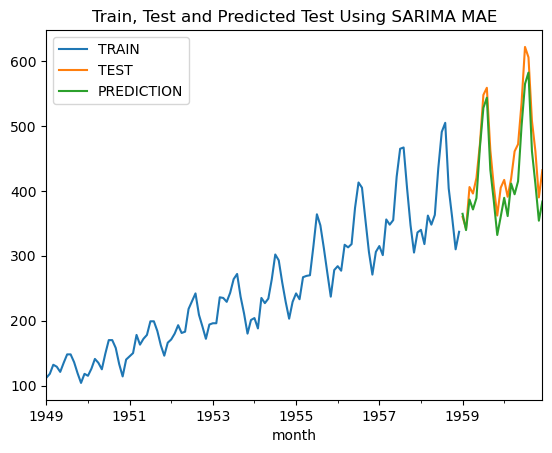

In [39]:
plot_prediction(y_pred, "SARIMA MAE")

In [40]:
errorDf = pd.DataFrame(errors, index=["SES","DES","TES","ARIMA","SARIMA_AIC","SARIMA_MAE"] )
errorDf

,0
SES,82.527993
DES,54.103558
TES,11.994664
ARIMA,64.011968
SARIMA_AIC,68.577265
SARIMA_MAE,30.610952


Bu sonuçlara göre en iyi model TES. Şimdi final olarak tüm veriseti üzerinden bir TES modeli oluşturalım.

In [45]:
final_model = ExponentialSmoothing(data, trend="add",seasonal= "add",seasonal_periods= 12).fit(smoothing_level= best_alpha, 
                                                                                               smoothing_trend= best_beta,
                                                                                              smoothing_seasonal= best_gamma)

In [46]:
final_model.forecast(1) # sonraki aylik tahmin

1961-01-01    450.286334
Freq: MS, dtype: float64

In [47]:
final_model.forecast(6) # sonraki 6 aylik tahmin

1961-01-01    450.286334
1961-02-01    429.302023
1961-03-01    475.721718
1961-04-01    502.017567
1961-05-01    516.825570
1961-06-01    579.037179
Freq: MS, dtype: float64